# Homework 07 - Challenge

In this homework you will apply your knowledge to create the best possible neural network to solve the FashionMNIST dataset. You can use everything that you have learned so far.

The challenge is hosted on Kaggle: https://www.kaggle.com/t/26e38cf09340459cb798670a65c1e239

You have to download the files 'train.csv' and 'test.csv' and place them in the same folder as below. Then run the next two cells.

The first one imports all required libraries.  
The second one loads the training data and splits it up into training and validation data. You should use the validation data for testing whether you model is able to generalize.

The test data is only used to generate your submission files.

In [13]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Load the training data and split up into training and validation data.
train_df = pd.read_csv('train.csv')
train_images = np.reshape(train_df.values[:,1:], newshape=(-1,28,28))
train_labels = train_df.values[:,0]
validation_images = train_images[50000:,:,:]
validation_labels = train_labels[50000:]
train_images = train_images[:50000,:,:]
train_labels = train_labels[:50000]

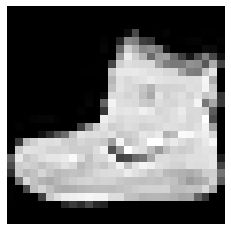

In [40]:
# Make sure the images are as desired:
plt.imshow(train_images[0],cmap='gray')
plt.axis('off')
plt.show()

## Your Part

In the following section you can do whatever you want. The following code is only there to display how a trained model can later be used to generate a submission file.

You first should generate a tensorflow dataset and so on.

In [41]:
from tensorflow.keras.layers import Layer

class Model(Layer):
    
    def __init__(self):
        super(Model, self).__init__()
        self.output_layer = tf.keras.layers.Dense(units=10,
                                               activation=tf.keras.activations.softmax
                                               )
        
    def call(self, x):
        x = tf.reshape(x, shape=(-1,784))
        x = self.output_layer(x)
        return x
    
model = Model()


for _ in range(3):
    # TRAIN YOUR MODEL
    print("SOMETHING")   

SOMETHING
SOMETHING
SOMETHING


### Generate Submission File (Do not change anything here!)

In [47]:
from datetime import datetime
now = datetime.now()
now_str = now.strftime('%d-%m-%Y-%H:%M:%S')

# Load the test data.
test_df = pd.read_csv('test.csv')
test_images = np.reshape(test_df.values[:,:], newshape=(-1,28,28))

# Get predictions.
output = model(test_images).numpy()
predictions = np.argmax(output, axis=1)

# Save submission file.
submission_data = np.zeros((10000,2), dtype=np.int)
submission_data[:,0] = np.arange(10000)
submission_data[:,1] = predictions
df_submission = pd.DataFrame(data=data, columns=['ImageId','Prediction'], dtype=str)
df_submission.to_csv('submission-'+ now_str +'.csv')